## Plots Used in the Hereditary Geometry Section

In [2]:
import sys, os
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, FancyArrowPatch
from matplotlib.path import Path
from matplotlib.lines import Line2D
import numpy as np

sys.path.append(os.path.abspath('../..'))

from constants import FIG_HEIGHT, LABEL_FONT_SIZE

In [3]:
RADII = [0.2, 0.4, 0.6, 0.8]

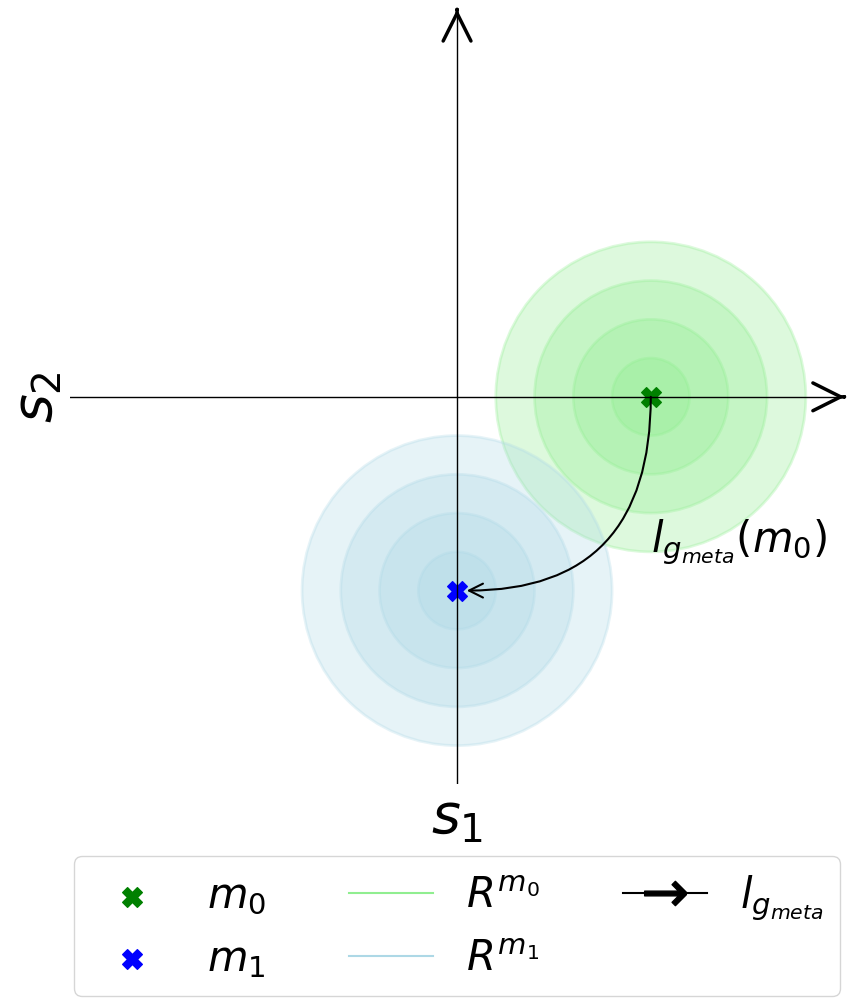

In [4]:
fig, ax = plt.subplots(figsize=(FIG_HEIGHT, FIG_HEIGHT))

# Set limits and aspect ratio
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_aspect('equal')
# coordinate system
import numpy as np
from matplotlib.cm import get_cmap

# Create Coordinate system in the background
# grid_res = 100
# x = np.linspace(-2, 2, grid_res)
# y = np.linspace(-2, 2, grid_res)
# X, Y = np.meshgrid(x, y)
# Z = X + Y
# ax.imshow(Z, extent=[-2, 2, -2, 2], origin='upper', cmap='Greys', alpha=0.2, aspect='auto', zorder=0)
ax.set_xticks([])
ax.set_yticks([])


# Draw axes
ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)
ax.annotate('', xy=(2.0, 0), xytext=(1.999, 0),
            arrowprops=dict(arrowstyle='->', linewidth=2.5, color='black', mutation_scale=50))
ax.annotate('', xy=(0, 2), xytext=(0, 1.999),
            arrowprops=dict(arrowstyle='->', linewidth=2.5, color='black', mutation_scale=50))

# Base Task
for r in RADII:
    circle = plt.Circle((1, 0), r, edgecolor='lightgreen', facecolor='lightgreen', alpha=0.3, linewidth=2)
    ax.add_patch(circle)
ax.plot([], [], color='lightgreen', label=r'$R^{m_0}$')

# Rotated task
for r in RADII:
    circle = plt.Circle((0, -1), r, edgecolor='lightblue', facecolor='lightblue', alpha=0.3, linewidth=2)
    ax.add_patch(circle)
ax.plot([], [], color='lightblue', label=r'$R^{m_1}$')

# Task encodings
ax.scatter(1,0, marker="X", color="green", label="$m_0$", s=200)
ax.scatter(0,-1, marker="X", color="blue", label="$m_1$", s=200)

# Add left action
path_data = [
    (Path.MOVETO, (1, 0)),
    (Path.CURVE3, (1, -1)),
    (Path.CURVE3, (0.05, -1)),
]
codes, verts = zip(*path_data)
path = Path(verts, codes)
arrow = FancyArrowPatch(path=path, arrowstyle='->', color='black', linewidth=1.5, mutation_scale=25)
ax.add_patch(arrow)
ax.annotate(r'$l_{g_{meta}}(m_0)$', xy=(1, -0.8), fontsize=1.5 * LABEL_FONT_SIZE)

for spine in ax.spines.values():
    spine.set_visible(False)
ax.set_xlabel(r'$s_1$', fontsize=2 * LABEL_FONT_SIZE)
ax.set_ylabel(r'$s_2$', fontsize=2 * LABEL_FONT_SIZE)

# Legend
handles, labels = ax.get_legend_handles_labels()
arrow_handle = Line2D([0], [0], color='black', linestyle='-', marker=r'$\rightarrow$', markersize=30, label=r'$l_{g_{meta}}$')
handles.append(arrow_handle)
labels.append(r'$l_{g_{meta}}$')
desired_order = ["$m_0$", "$m_1$", r"$R^{m_0}$", r"$R^{m_1}$", r"$l_{g_{meta}}$"]
ordered = sorted(zip(handles, labels), key=lambda x: desired_order.index(x[1]))
ordered_handles, ordered_labels = zip(*ordered)
# Move legend below the plot
fig.subplots_adjust(bottom=0.05)  # Adjust to make room for legend
ax.legend(ordered_handles, ordered_labels,
          fontsize=1.5 * LABEL_FONT_SIZE,
          ncol=3, loc='lower center', bbox_to_anchor=(0.5, -0.3))

plt.savefig("geo_meta_mdp.png", dpi=300, bbox_inches='tight')

plt.show()

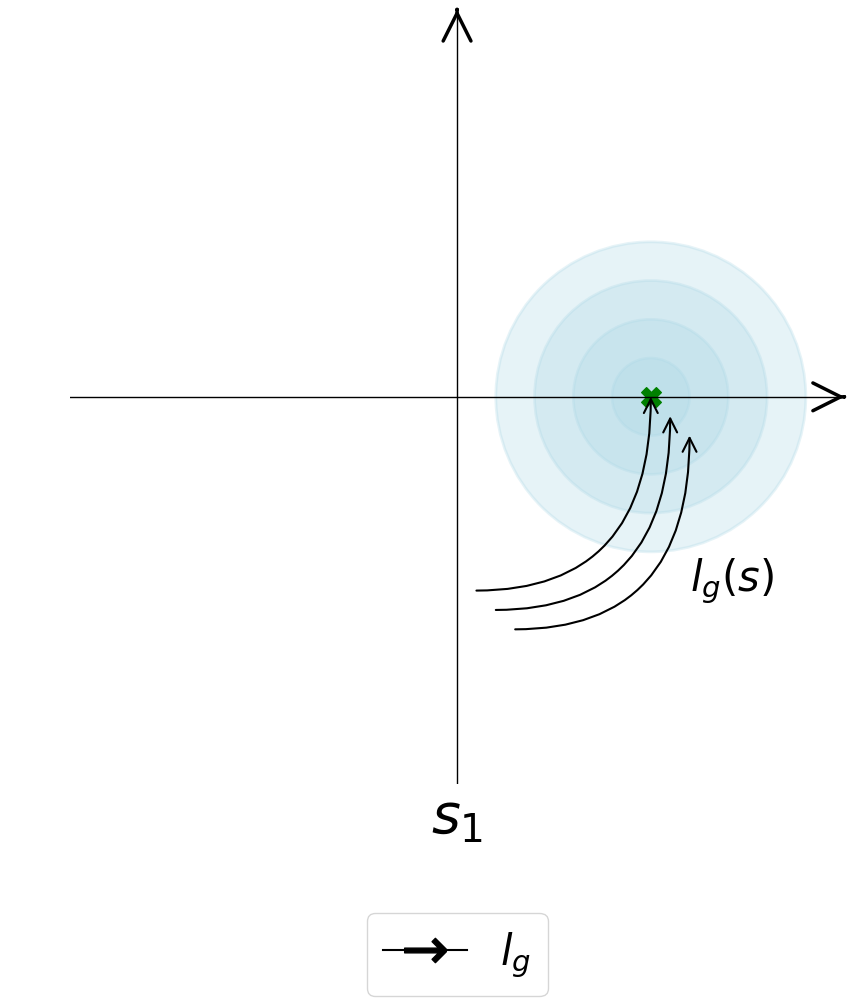

In [5]:
fig, ax = plt.subplots(figsize=(FIG_HEIGHT, FIG_HEIGHT))

# Set limits and aspect ratio
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_aspect('equal')
# coordinate system
import numpy as np

ax.set_xticks([])
ax.set_yticks([])


# Draw axes
ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)
# Arrow for s1 (x-axis)
ax.annotate('', xy=(2.0, 0), xytext=(1.999, 0),
            arrowprops=dict(arrowstyle='->', linewidth=2.5, color='black', mutation_scale=50))
# Arrow for s2 (y-axis)
ax.annotate('', xy=(0, 2), xytext=(0, 1.999),
            arrowprops=dict(arrowstyle='->', linewidth=2.5, color='black', mutation_scale=50))



# Rotated Task
for r in RADII:
    circle = plt.Circle((1, 0), r, edgecolor='lightblue', facecolor='lightblue', alpha=0.3, linewidth=2)
    ax.add_patch(circle)

# Task encodings
ax.scatter(1,0, marker="X", color="green", s=200)

# Add left actions
g_action_shifts = [0, 0.1, 0.2]
for g_action_shift in g_action_shifts:
    path_data = [
        (Path.MOVETO, (1+g_action_shift, -g_action_shift)),
        (Path.CURVE3, (1+g_action_shift, -1-g_action_shift)),
        (Path.CURVE3, (0.1+g_action_shift, -1.0-g_action_shift)),
    ]
    codes, verts = zip(*path_data)
    path = Path(verts, codes)
    arrow = FancyArrowPatch(path=path, arrowstyle='<-', color='black', linewidth=1.5, mutation_scale=25)
    ax.add_patch(arrow)
ax.annotate(r'$l_g(s)$', xy=(1 + g_action_shifts[-1], -0.8- g_action_shifts[-1]), fontsize=1.5 * LABEL_FONT_SIZE)


for spine in ax.spines.values():
    spine.set_visible(False)
ax.set_xlabel(r'$s_1$', fontsize=2 * LABEL_FONT_SIZE)
ax.set_ylabel(r'$s_2$', fontsize=2 * LABEL_FONT_SIZE, color="white")

# Legend
handles, labels = ax.get_legend_handles_labels()
arrow_handle = Line2D([0], [0], color='black', linestyle='-', marker=r'$\rightarrow$', markersize=30, label=r'$l_g$')
handles.append(arrow_handle)
labels.append(r'$l_g$')
desired_order = [r"$l_g$"]
ordered = sorted(zip(handles, labels), key=lambda x: desired_order.index(x[1]))
ordered_handles, ordered_labels = zip(*ordered)
fig.subplots_adjust(bottom=0.05)  # Adjust to make room for legend
ax.legend(ordered_handles, ordered_labels,
          fontsize=1.5 * LABEL_FONT_SIZE,
          ncol=2, loc='lower center', bbox_to_anchor=(0.5, -0.3))

# Save figure

plt.savefig("hereditary_geometry.png", dpi=300, bbox_inches='tight')
plt.show()

## Hereditary Geometries Enable Local Generalization

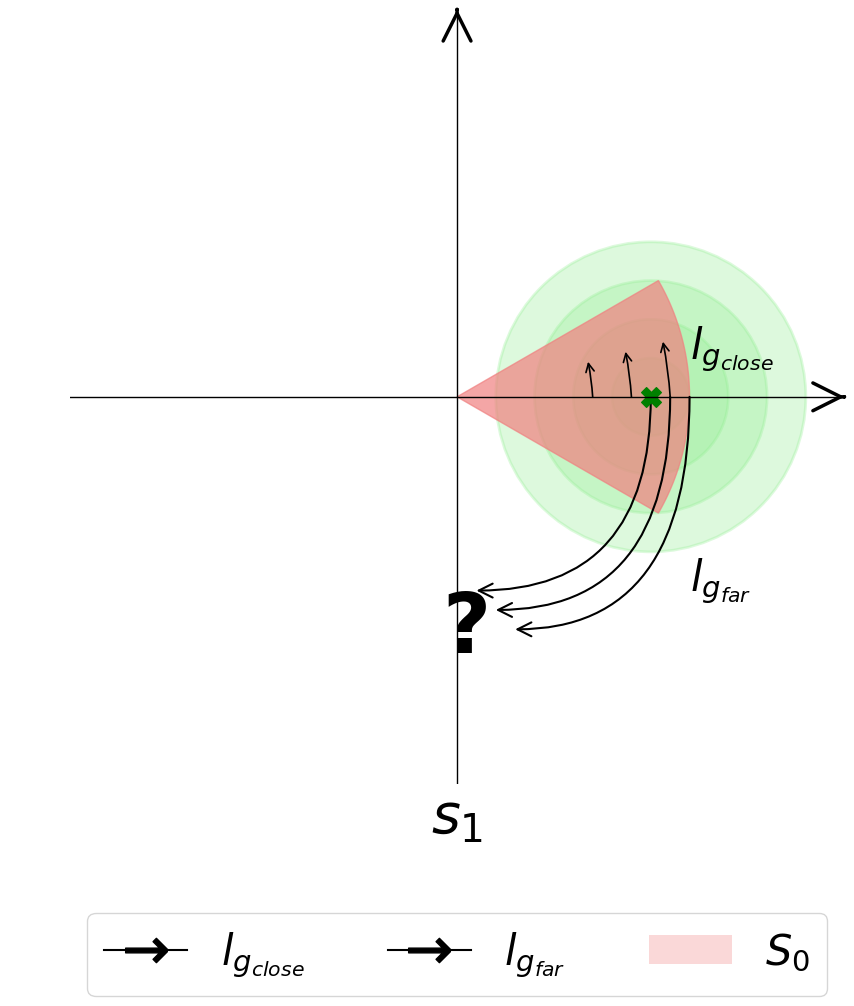

In [6]:
from matplotlib.patches import Polygon
from matplotlib.patches import Patch

fig, ax = plt.subplots(figsize=(FIG_HEIGHT, FIG_HEIGHT))

# Set limits and aspect ratio
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_aspect('equal')
# coordinate system
import numpy as np

ax.set_xticks([])
ax.set_yticks([])


# Draw axes
ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)
# Arrow for s1 (x-axis)
ax.annotate('', xy=(2.0, 0), xytext=(1.999, 0),
            arrowprops=dict(arrowstyle='->', linewidth=2.5, color='black', mutation_scale=50))
# Arrow for s2 (y-axis)
ax.annotate('', xy=(0, 2), xytext=(0, 1.999),
            arrowprops=dict(arrowstyle='->', linewidth=2.5, color='black', mutation_scale=50))



# Rotated Task
for r in RADII:
    circle = plt.Circle((1, 0), r, edgecolor='lightgreen', facecolor='lightgreen', alpha=0.3, linewidth=2)
    ax.add_patch(circle)

# Task encodings
for spine in ax.spines.values():
    spine.set_visible(False)
ax.set_xlabel(r'$s_1$', fontsize=2 * LABEL_FONT_SIZE)
ax.set_ylabel(r'$s_2$', fontsize=2 * LABEL_FONT_SIZE, color="white")

# Occupancy Measure
cone_length = 1.2
cone_angle = np.deg2rad(30)  # half-angle of the cone
num_points = 100
theta = np.linspace(-cone_angle, cone_angle, num_points)
r = cone_length
arc_x = r * np.cos(theta)
arc_y = r * np.sin(theta)
cone_x = np.concatenate([[0], arc_x, [0]])
cone_y = np.concatenate([[0], arc_y, [0]])
cone_patch = Polygon(np.column_stack([cone_x, cone_y]), closed=True, color='lightcoral', alpha=0.7, zorder=1)
ax.add_patch(cone_patch)
cone_legend = Patch(facecolor='lightcoral', edgecolor='none', alpha=0.3, label=r'$S_0$')


# Nearby left-action
rotation_angle = np.deg2rad(15)  # fixed small rotation angle
radii = [0.7, 0.9, 1.1]  # slightly different radii for parallel arcs

for r in radii:
    start = np.array([r, 0])
    end = r * np.array([np.cos(rotation_angle), np.sin(rotation_angle)])
    mid_angle = rotation_angle / 2
    control = r * np.array([np.cos(mid_angle), np.sin(mid_angle)])

    path_data = [
        (Path.MOVETO, start),
        (Path.CURVE3, control),
        (Path.CURVE3, end),
    ]
    codes, verts = zip(*path_data)
    path = Path(verts, codes)
    arrow = FancyArrowPatch(path=path, arrowstyle='->', color='black',
                            linewidth=1.2, mutation_scale=15)
    ax.add_patch(arrow)
ax.annotate(r'$l_{g_{close}}$', xy=(1.2, 0.2), fontsize=1.5 * LABEL_FONT_SIZE)



# Distant left action
g_action_shifts = [0, 0.1, 0.2]
for g_action_shift in g_action_shifts:
    path_data = [
        (Path.MOVETO, (1+g_action_shift, 0)),
        (Path.CURVE3, (1+g_action_shift, -1-g_action_shift)),
        (Path.CURVE3, (0.1+g_action_shift, -1.0-g_action_shift)),
    ]
    codes, verts = zip(*path_data)
    path = Path(verts, codes)
    arrow = FancyArrowPatch(path=path, arrowstyle='->', color='black', linewidth=1.5, mutation_scale=25)
    ax.add_patch(arrow)
ax.annotate(r'$l_{g_{far}}$', xy=(1 + g_action_shifts[-1], -0.8- g_action_shifts[-1]), fontsize=1.5 * LABEL_FONT_SIZE)


ax.scatter(1,0, marker="X", color="green", s=200)
ax.text(0.05, -1.2, "?", fontsize=3 * LABEL_FONT_SIZE, fontweight='bold', ha='center', va='center')

# Legend
handles, labels = ax.get_legend_handles_labels()
arrow_handle = Line2D([0], [0], color='black', linestyle='-', marker=r'$\rightarrow$', markersize=30, label=r'$l_g$')
far_arrow_handle = Line2D([0], [0], color='black', linestyle='-', marker=r'$\rightarrow$', markersize=30, label=r'$l_{g_{far}}$')
handles.append(far_arrow_handle)
handles.append(arrow_handle)
handles.append(cone_legend)
labels.append(r'$l_{g_{close}}$')
labels.append(r'$l_{g_{far}}$')
labels.append(r'$S_0$')  # Or whatever label you prefer
desired_order = [r"$l_{g_{close}}$", r"$l_{g_{far}}$", r"$S_0$"]
ordered = sorted(zip(handles, labels), key=lambda x: desired_order.index(x[1]))
ordered_handles, ordered_labels = zip(*ordered)
fig.subplots_adjust(bottom=0.05)  # Adjust to make room for legend
ax.legend(ordered_handles, ordered_labels,
          fontsize=1.5 * LABEL_FONT_SIZE,
          ncol=3, loc='lower center', bbox_to_anchor=(0.5, -0.3))

# Save figure

plt.savefig("local_generalization.png", dpi=300, bbox_inches='tight')
plt.show()

## Hereditary Geometry But Not Symmetry

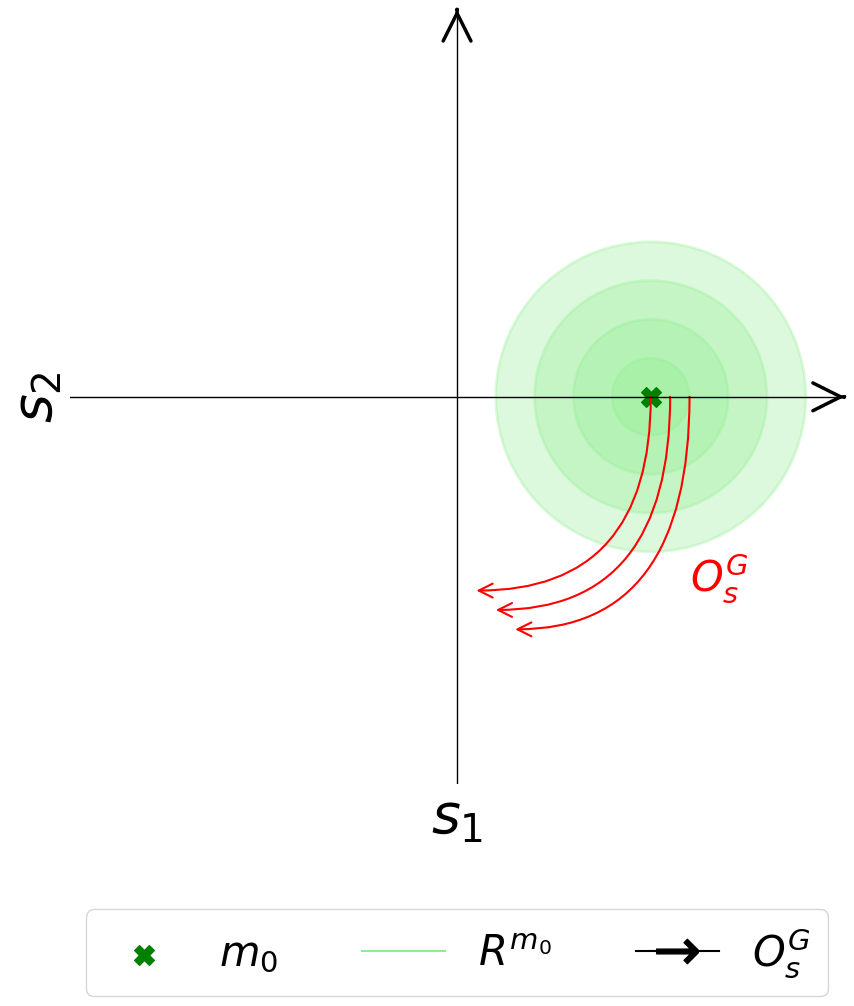

In [7]:
fig, ax = plt.subplots(figsize=(FIG_HEIGHT, FIG_HEIGHT))

# Set limits and aspect ratio
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_aspect('equal')
# coordinate system
import numpy as np

ax.set_xticks([])
ax.set_yticks([])


# Draw axes
ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)
# Arrow for s1 (x-axis)
ax.annotate('', xy=(2.0, 0), xytext=(1.999, 0),
            arrowprops=dict(arrowstyle='->', linewidth=2.5, color='black', mutation_scale=50))
# Arrow for s2 (y-axis)
ax.annotate('', xy=(0, 2), xytext=(0, 1.999),
            arrowprops=dict(arrowstyle='->', linewidth=2.5, color='black', mutation_scale=50))



# Rotated Task
for r in RADII:
    circle = plt.Circle((1, 0), r, edgecolor='lightgreen', facecolor='lightgreen', alpha=0.3, linewidth=2)
    ax.add_patch(circle)
ax.plot([], [], color='lightgreen', label=r'$R^{m_0}$')

# Task encodings
ax.scatter(1,0, marker="X", color="green", label="$m_0$", s=200)

# Add left actions
g_action_shifts = [0, 0.1, 0.2]
for g_action_shift in g_action_shifts:
    path_data = [
        (Path.MOVETO, (1+g_action_shift, 0)),
        (Path.CURVE3, (1+g_action_shift, -1-g_action_shift)),
        (Path.CURVE3, (0.1+g_action_shift, -1.0-g_action_shift)),
    ]
    codes, verts = zip(*path_data)
    path = Path(verts, codes)
    arrow = FancyArrowPatch(path=path, arrowstyle='->', color='red', linewidth=1.5, mutation_scale=25)
    ax.add_patch(arrow)
ax.annotate(r'$O^G_s$', xy=(1 + g_action_shifts[-1], -0.8- g_action_shifts[-1]), fontsize=1.5 * LABEL_FONT_SIZE, color="red")


for spine in ax.spines.values():
    spine.set_visible(False)
ax.set_xlabel(r'$s_1$', fontsize=2 * LABEL_FONT_SIZE)
ax.set_ylabel(r'$s_2$', fontsize=2 * LABEL_FONT_SIZE)

# Legend
handles, labels = ax.get_legend_handles_labels()
arrow_handle = Line2D([0], [0], color='black', linestyle='-', marker=r'$\rightarrow$', markersize=30, label=r'$l_g$')
handles.append(arrow_handle)
labels.append(r'$O^G_s$')
desired_order = ["$m_0$", "$m_1$", r"$R^{m_0}$", r"$O^G_s$"]
ordered = sorted(zip(handles, labels), key=lambda x: desired_order.index(x[1]))
ordered_handles, ordered_labels = zip(*ordered)
fig.subplots_adjust(bottom=0.05)  # Adjust to make room for legend
ax.legend(ordered_handles, ordered_labels,
          fontsize=1.5 * LABEL_FONT_SIZE,
          ncol=3, loc='lower center', bbox_to_anchor=(0.5, -0.3))

# Save figure

plt.savefig("her_geo_no_sym.png", dpi=300, bbox_inches='tight')
plt.show()

## Hereditary Symmetry

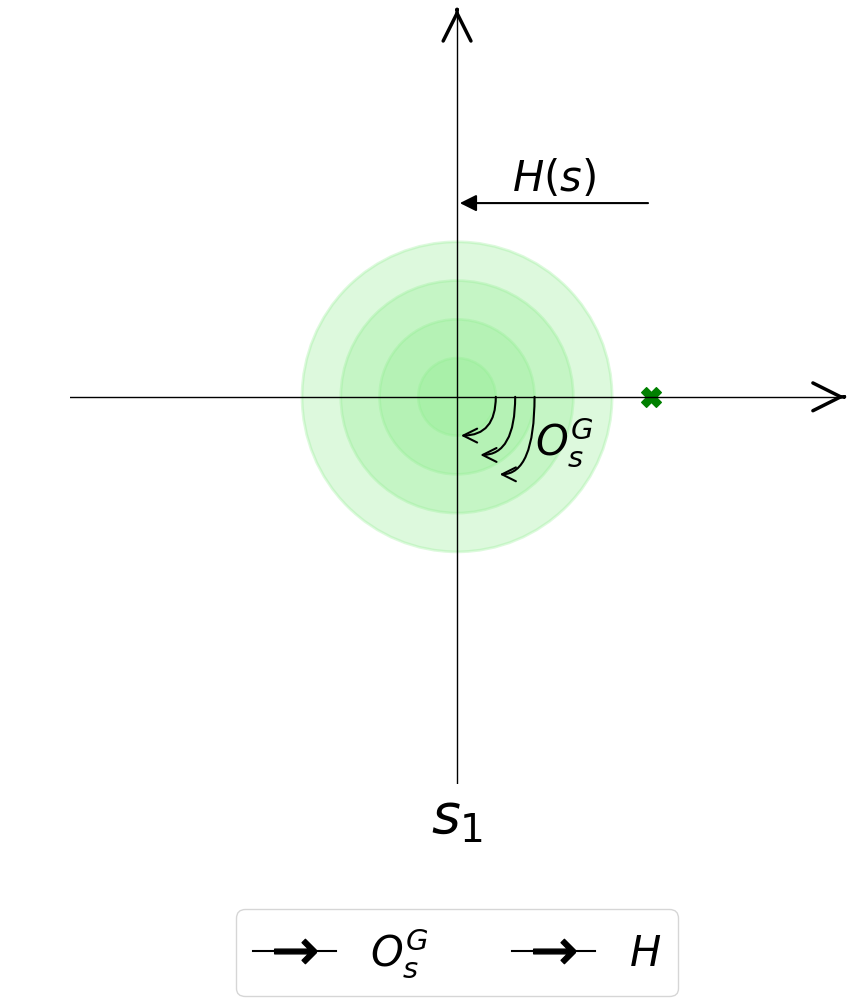

In [8]:
fig, ax = plt.subplots(figsize=(FIG_HEIGHT, FIG_HEIGHT))

# Set limits and aspect ratio
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_aspect('equal')
# coordinate system
import numpy as np

ax.set_xticks([])
ax.set_yticks([])


# Draw axes
ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)
# Arrow for s1 (x-axis)
ax.annotate('', xy=(2.0, 0), xytext=(1.999, 0),
            arrowprops=dict(arrowstyle='->', linewidth=2.5, color='black', mutation_scale=50))
# Arrow for s2 (y-axis)
ax.annotate('', xy=(0, 2), xytext=(0, 1.999),
            arrowprops=dict(arrowstyle='->', linewidth=2.5, color='black', mutation_scale=50))



# Rotated Task
for r in RADII:
    circle = plt.Circle((0, 0), r, edgecolor='lightgreen', facecolor='lightgreen', alpha=0.3, linewidth=2)
    ax.add_patch(circle)

# Task encodings
ax.scatter(1,0, marker="X", color="green", s=200)

# Add left actions
g_action_shifts = [0, 0.1, 0.2]
for g_action_shift in g_action_shifts:
    path_data = [
        (Path.MOVETO, (0.2+g_action_shift, 0)),
        (Path.CURVE3, (0.2+g_action_shift, -0.2-g_action_shift)),
        (Path.CURVE3, (0.02+g_action_shift, -0.2-g_action_shift)),
    ]
    codes, verts = zip(*path_data)
    path = Path(verts, codes)
    arrow = FancyArrowPatch(path=path, arrowstyle='->', color='black', linewidth=1.5, mutation_scale=25)
    ax.add_patch(arrow)
ax.annotate(r'$O^G_s$', xy=(0.2 + g_action_shifts[-1], -0.1- g_action_shifts[-1]), fontsize=1.5 * LABEL_FONT_SIZE)

# Draw change of basis
ax.annotate(
    '',
    xy=(0, 1), xytext=(1, 1),
    arrowprops=dict(
        arrowstyle='-|>',
        color='black',
        linewidth=1.5,        
        mutation_scale=25
    )
)
ax.text(
    0.5, 1.02,  # Midpoint of the arrow + slight vertical offset
    r'$H(s)$',
    fontsize=1.5 * LABEL_FONT_SIZE,
    ha='center', va='bottom'
)



for spine in ax.spines.values():
    spine.set_visible(False)
ax.set_xlabel(r'$s_1$', fontsize=2 * LABEL_FONT_SIZE)
ax.set_ylabel(r'$s_2$', fontsize=2 * LABEL_FONT_SIZE, color="white")

# Legend
handles, labels = ax.get_legend_handles_labels()
arrow_handle = Line2D([0], [0], color='black', linestyle='-', marker=r'$\rightarrow$', markersize=30, label=r'$l_g$')
handles.append(arrow_handle)
labels.append(r'$O^G_s$')
arrow_handle = Line2D([0], [0], color='black', linestyle='-', marker=r'$\rightarrow$', markersize=30, label=r'$l_g$')
handles.append(arrow_handle)
labels.append(r'$H$')
handles.append(arrow_handle)
desired_order=[r'$O^G_s$', r"$H$"]
ordered = sorted(zip(handles, labels), key=lambda x: desired_order.index(x[1]))
ordered_handles, ordered_labels = zip(*ordered)
fig.subplots_adjust(bottom=0.05)  # Adjust to make room for legend
ax.legend(ordered_handles, ordered_labels,
          fontsize=1.5 * LABEL_FONT_SIZE,
          ncol=3, loc='lower center', bbox_to_anchor=(0.5, -0.3))

# Save figure

plt.savefig("hereditary_symmetry.png", dpi=300, bbox_inches='tight')
plt.show()

## Global Generalization

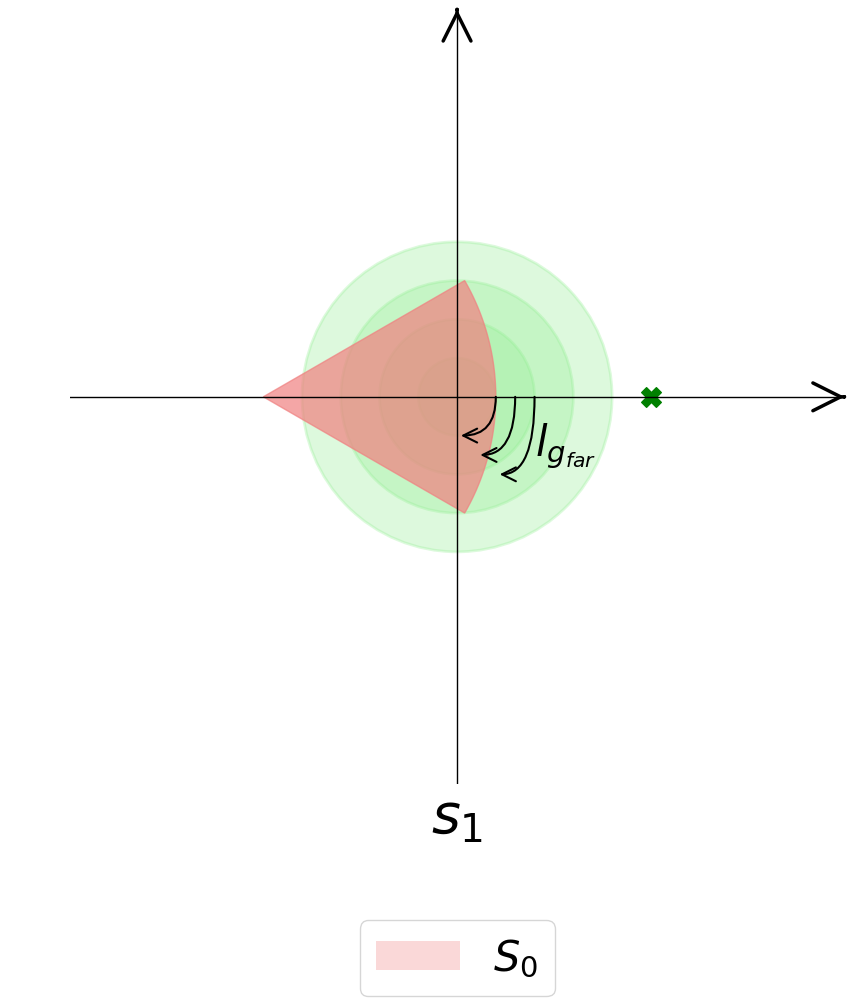

In [11]:
fig, ax = plt.subplots(figsize=(FIG_HEIGHT, FIG_HEIGHT))

# Set limits and aspect ratio
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_aspect('equal')
# coordinate system
import numpy as np

ax.set_xticks([])
ax.set_yticks([])


# Draw axes
ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)
# Arrow for s1 (x-axis)
ax.annotate('', xy=(2.0, 0), xytext=(1.999, 0),
            arrowprops=dict(arrowstyle='->', linewidth=2.5, color='black', mutation_scale=50))
# Arrow for s2 (y-axis)
ax.annotate('', xy=(0, 2), xytext=(0, 1.999),
            arrowprops=dict(arrowstyle='->', linewidth=2.5, color='black', mutation_scale=50))



# Rotated Task
for r in RADII:
    circle = plt.Circle((0, 0), r, edgecolor='lightgreen', facecolor='lightgreen', alpha=0.3, linewidth=2)
    ax.add_patch(circle)
ax.plot([], [], color='lightgreen')

# Occupancy Measure
cone_length = 1.2
cone_angle = np.deg2rad(30)  # half-angle of the cone
num_points = 100
theta = np.linspace(-cone_angle, cone_angle, num_points)
r = cone_length
arc_x = r * np.cos(theta)
arc_y = r * np.sin(theta)
cone_x = np.concatenate([[-1], arc_x - 1, [-1]])
cone_y = np.concatenate([[0], arc_y, [0]])
cone_patch = Polygon(np.column_stack([cone_x, cone_y]), closed=True, color='lightcoral', alpha=0.7, zorder=1)
ax.add_patch(cone_patch)
cone_legend = Patch(facecolor='lightcoral', edgecolor='none', alpha=0.3, label=r'$S_0$')


# Task encodings
ax.scatter(1,0, marker="X", color="green", s=200)

# Add left actions
g_action_shifts = [0, 0.1, 0.2]
for g_action_shift in g_action_shifts:
    path_data = [
        (Path.MOVETO, (0.2+g_action_shift, 0)),
        (Path.CURVE3, (0.2+g_action_shift, -0.2-g_action_shift)),
        (Path.CURVE3, (0.02+g_action_shift, -0.2-g_action_shift)),
    ]
    codes, verts = zip(*path_data)
    path = Path(verts, codes)
    arrow = FancyArrowPatch(path=path, arrowstyle='->', color='black', linewidth=1.5, mutation_scale=25)
    ax.add_patch(arrow)
ax.annotate(r'$l_{g_{far}}$', xy=(0.2 + g_action_shifts[-1], -0.1- g_action_shifts[-1]), fontsize=1.5 * LABEL_FONT_SIZE)



for spine in ax.spines.values():
    spine.set_visible(False)
ax.set_xlabel(r'$s_1$', fontsize=2 * LABEL_FONT_SIZE)
ax.set_ylabel(r'$s_2$', fontsize=2 * LABEL_FONT_SIZE, color="white")

# Legend
handles, labels = ax.get_legend_handles_labels()
handles.append(cone_legend)
labels.append(r'$S_0$')  # Or whatever label you prefer
desired_order = [r"$S_0$"]
ordered = sorted(zip(handles, labels), key=lambda x: desired_order.index(x[1]))
ordered_handles, ordered_labels = zip(*ordered)
fig.subplots_adjust(bottom=0.05)  # Adjust to make room for legend
ax.legend(ordered_handles, ordered_labels,
          fontsize=1.5 * LABEL_FONT_SIZE,
          ncol=3, loc='lower center', bbox_to_anchor=(0.5, -0.3))

# Save figure

plt.savefig("global_generalization.png", dpi=300, bbox_inches='tight')
plt.show()

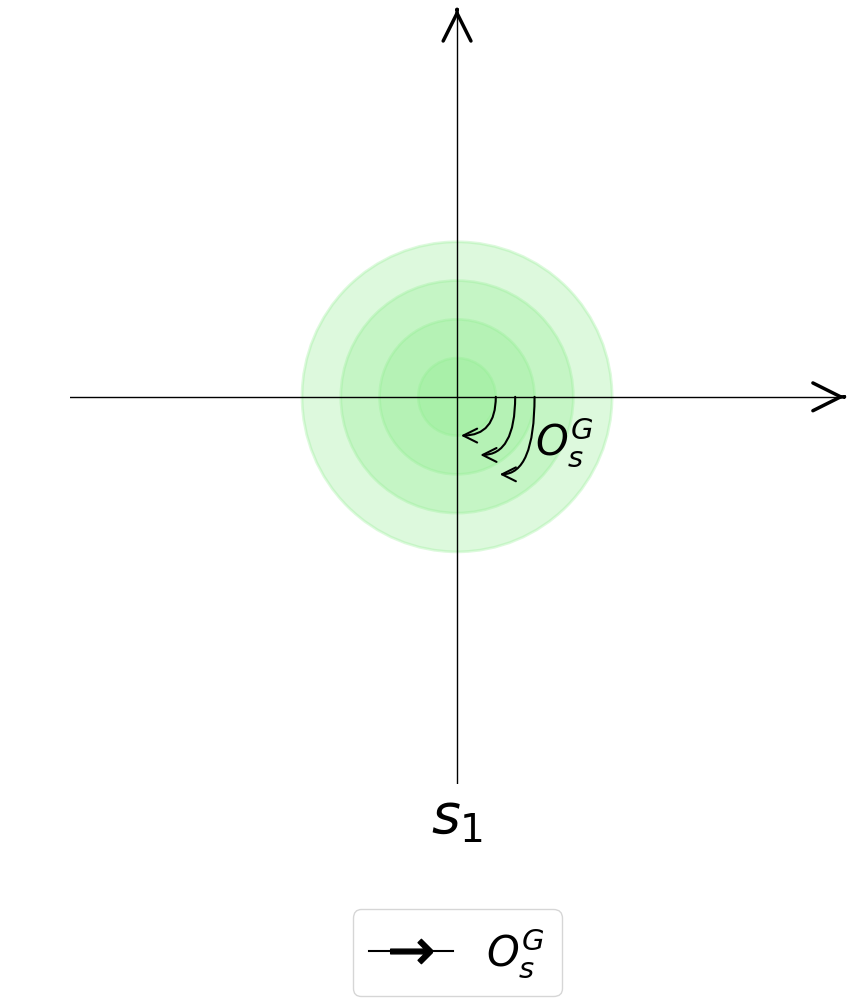

In [16]:
fig, ax = plt.subplots(figsize=(FIG_HEIGHT, FIG_HEIGHT))

# Set limits and aspect ratio
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_aspect('equal')
# coordinate system
import numpy as np

ax.set_xticks([])
ax.set_yticks([])


# Draw axes
ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)
# Arrow for s1 (x-axis)
ax.annotate('', xy=(2.0, 0), xytext=(1.999, 0),
            arrowprops=dict(arrowstyle='->', linewidth=2.5, color='black', mutation_scale=50))
# Arrow for s2 (y-axis)
ax.annotate('', xy=(0, 2), xytext=(0, 1.999),
            arrowprops=dict(arrowstyle='->', linewidth=2.5, color='black', mutation_scale=50))



# Rotated Task
for r in RADII:
    circle = plt.Circle((0, 0), r, edgecolor='lightgreen', facecolor='lightgreen', alpha=0.3, linewidth=2)
    ax.add_patch(circle)

# Add left actions
g_action_shifts = [0, 0.1, 0.2]
for g_action_shift in g_action_shifts:
    path_data = [
        (Path.MOVETO, (0.2+g_action_shift, 0)),
        (Path.CURVE3, (0.2+g_action_shift, -0.2-g_action_shift)),
        (Path.CURVE3, (0.02+g_action_shift, -0.2-g_action_shift)),
    ]
    codes, verts = zip(*path_data)
    path = Path(verts, codes)
    arrow = FancyArrowPatch(path=path, arrowstyle='->', color='black', linewidth=1.5, mutation_scale=25)
    ax.add_patch(arrow)
ax.annotate(r'$O^G_s$', xy=(0.2 + g_action_shifts[-1], -0.1- g_action_shifts[-1]), fontsize=1.5 * LABEL_FONT_SIZE)


for spine in ax.spines.values():
    spine.set_visible(False)
ax.set_xlabel(r'$s_1$', fontsize=2 * LABEL_FONT_SIZE)
ax.set_ylabel(r'$s_2$', fontsize=2 * LABEL_FONT_SIZE, color="white")

# Legend
handles, labels = ax.get_legend_handles_labels()
arrow_handle = Line2D([0], [0], color='black', linestyle='-', marker=r'$\rightarrow$', markersize=30, label=r'$l_g$')
handles.append(arrow_handle)
labels.append(r'$O^G_s$')
arrow_handle = Line2D([0], [0], color='black', linestyle='-', marker=r'$\rightarrow$', markersize=30, label=r'$l_g$')
handles.append(arrow_handle)
desired_order=[r'$O^G_s$']
ordered = sorted(zip(handles, labels), key=lambda x: desired_order.index(x[1]))
ordered_handles, ordered_labels = zip(*ordered)
fig.subplots_adjust(bottom=0.05)  # Adjust to make room for legend
ax.legend(ordered_handles, ordered_labels,
          fontsize=1.5 * LABEL_FONT_SIZE,
          ncol=3, loc='lower center', bbox_to_anchor=(0.5, -0.3))

# Save figure

plt.savefig("symmetry.png", dpi=300, bbox_inches='tight')
plt.show()